In [1]:
using PyPlot
using KrylovKit
using DelimitedFiles
using LinearAlgebra
using SparseArrays

In [10]:
using TopologyOptimizationHelper

In [11]:
Lx = 5
Ly = 5
res = 20 
ω = π
N = M = 120;

In [12]:
b = zeros(N,M)
offset = -round(Int, res * (0.2 + 1.5))
b[N÷2 + offset,M÷2] = 1
ε_vac = ones(N,M)
A_vac, _, _ = Maxwell2d(Lx, Ly, ε_vac, ω; resolution=res)
u = A_vac \ vec(b)
@show LDOS_vac = -imag(u' * vec(b))

LDOS_vac = -(imag(u' * vec(b))) = 0.0006160575230599792


0.0006160575230599792

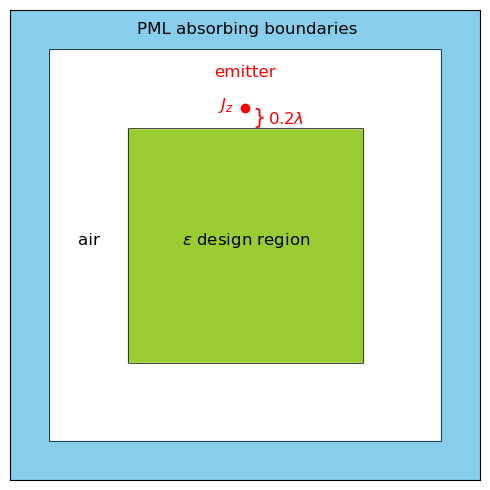

In [62]:
# Set up the figure and axis
figure(figsize=(5, 5))
xlim(0, 6)
ylim(0, 6)  # Dummy y-range

# Color regions
axvspan(1.5, 4.5, color="yellowgreen")
axhspan(4.5, 5.5, color="white")
axhspan(0.5, 1.5, color="white")
axvspan(5.5, 6, color="skyblue")
axvspan(0, 0.5, color="skyblue")

axhspan(0, 0.5, color="skyblue")
axhspan(5.5, 6, color="skyblue")

vlines(0.5, 0.5, 5.5; color="black", linewidth=0.5)
vlines(5.5, 0.5, 5.5; color="black", linewidth=0.5)
vlines(1.5, 1.5, 4.5; color="black", linewidth=0.5)
vlines(4.5, 1.5, 4.5; color="black", linewidth=0.5)
hlines(0.5, 0.5, 5.5; color="black", linewidth=0.5)
hlines(5.5, 0.5, 5.5; color="black", linewidth=0.5)
hlines(1.5, 1.5, 4.5; color="black", linewidth=0.5)
hlines(4.5, 1.5, 4.5; color="black", linewidth=0.5)

text(1.625, 5.7, "PML absorbing boundaries", bbox=Dict("facecolor" => "skyblue", "edgecolor" => "skyblue", "boxstyle" => "square"), fontsize=12)
text(2.20, 3, L"$ε$ design region", bbox=Dict("facecolor" => "yellowgreen", "edgecolor" => "yellowgreen", "boxstyle" => "square"), fontsize=12)
text(0.87, 3, "air", fontsize=12)
text(3.1, 4.55, "}", fontsize=15, color="red")
text(3.3, 4.55, L"$0.2λ$", color="red", fontsize=12)
text(2.6, 5.15, "emitter", color="red", bbox=Dict("facecolor" => "white", "edgecolor" => "white", "boxstyle" => "square"), fontsize=12)
text(2.65, 4.72, L"$J_z$", fontsize=12, color="red")


# Add red vertical line at center
plot(3, 3.25 + 1.5, "ro")

# Ticks and labels
xticks([])
yticks([])

tight_layout()
savefig("region2d.pdf")

In [61]:
outside_ε_init = readdlm("outside_design_region_epsilon_init.txt")
outside_ε_opt = readdlm("outside_design_region_epsilon_opt.txt")
outside_mod_ε_opt = readdlm("outside_design_region_mod_epsilon_opt.txt")
outside_Qs = readdlm("outside_design_region_Qs.txt")
outside_mod_Qs = readdlm("outside_design_region_mod_Qs.txt")
outside_LDOS_vals = readdlm("outside_design_region_LDOS_vals.txt") / LDOS_vac
outside_mod_LDOS_vals = readdlm("outside_design_region_mod_LDOS_vals.txt") / LDOS_vac;

In [15]:
A, x, y = Maxwell2d(Lx, Ly, outside_ε_init, ω; resolution=res)
@show outside_ω₀_init = sqrt(Arnoldi_eig(A, vec(outside_ε_init), ω, vec(b))[1])
E⁻¹ = spdiagm(1 ./ vec(outside_ε_init))
vals, vecs, info = eigsolve(z -> E⁻¹ * A * z + ω^2 .* z, vec(b), 1, EigSorter(λ -> abs(λ - outside_ω₀_init^2); rev = false), Arnoldi()) 
outside_u_init = reshape(abs.(vecs[1]).^2, N,M)

A, x, y = Maxwell2d(Lx, Ly, outside_ε_opt, ω; resolution=res)
@show outside_ω₀_opt = sqrt(Arnoldi_eig(A, vec(outside_ε_opt), ω, vec(b))[1])
E⁻¹ = spdiagm(1 ./ vec(outside_ε_opt))
vals, vecs, info = eigsolve(z -> E⁻¹ * A * z + ω^2 .* z, vec(b), 1, EigSorter(λ -> abs(λ - outside_ω₀_opt^2); rev = false), Arnoldi()) 
outside_u_opt = reshape(abs.(vecs[1]).^2, N,M)

A, x, y = Maxwell2d(Lx, Ly, outside_mod_ε_opt, ω; resolution=res)
@show outside_mod_ω₀_opt = sqrt(Arnoldi_eig(A, vec(outside_mod_ε_opt), ω, vec(b))[1])
E⁻¹ = spdiagm(1 ./ vec(outside_mod_ε_opt))
vals, vecs, info = eigsolve(z -> E⁻¹ * A * z + ω^2 .* z, vec(b), 1, EigSorter(λ -> abs(λ - outside_mod_ω₀_opt^2); rev = false), Arnoldi()) 
outside_mod_u_opt = reshape(abs.(vecs[1]).^2, N,M);

outside_ω₀_init = sqrt((Arnoldi_eig(A, vec(outside_ε_init), ω, vec(b)))[1]) = 3.1455790522955818 - 0.017966675597124056im


┌ Warning: Arnoldi eigsolve stopped without convergence after 100 iterations:
│ * 0 eigenvalues converged
│ * norm of residuals = (2.91e+00)
│ * number of operations = 1218
└ @ KrylovKit C:\Users\jorge\.julia\packages\KrylovKit\jC5gU\src\eigsolve\arnoldi.jl:172


outside_ω₀_opt = sqrt((Arnoldi_eig(A, vec(outside_ε_opt), ω, vec(b)))[1]) = 3.141593767629947 - 0.0001026933604978322im


┌ Warning: Arnoldi eigsolve stopped without convergence after 100 iterations:
│ * 0 eigenvalues converged
│ * norm of residuals = (2.34e+00)
│ * number of operations = 1218
└ @ KrylovKit C:\Users\jorge\.julia\packages\KrylovKit\jC5gU\src\eigsolve\arnoldi.jl:172


outside_mod_ω₀_opt = sqrt((Arnoldi_eig(A, vec(outside_mod_ε_opt), ω, vec(b)))[1]) = 3.141594853138845 - 2.1556017805620536e-6im


┌ Warning: Arnoldi eigsolve stopped without convergence after 100 iterations:
│ * 0 eigenvalues converged
│ * norm of residuals = (1.02e+01)
│ * number of operations = 1218
└ @ KrylovKit C:\Users\jorge\.julia\packages\KrylovKit\jC5gU\src\eigsolve\arnoldi.jl:172


sys:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
sys:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
sys:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
sys:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


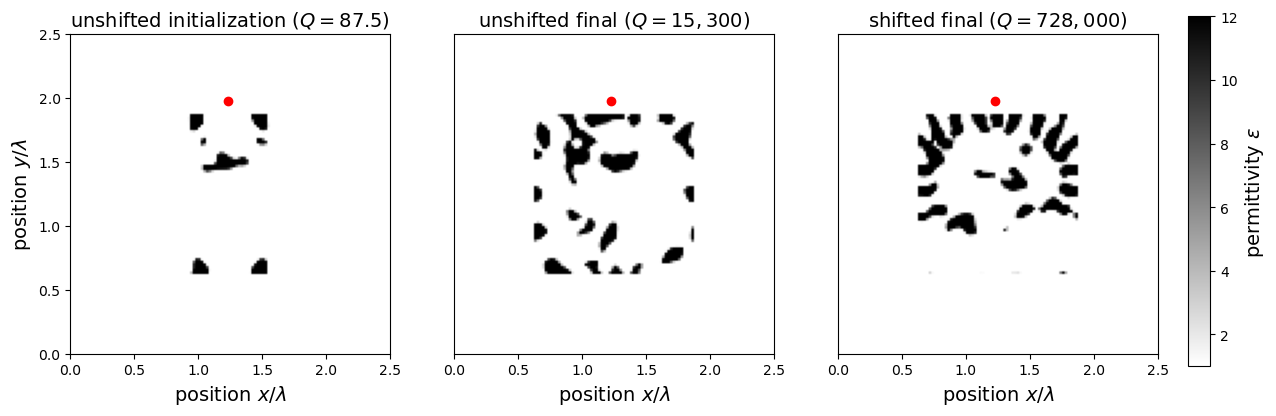

In [36]:
figure(figsize=(15, 5))  # Slightly wider to accommodate colorbar

subplot(1, 3, 1)
im1 = imshow(outside_ε_init, extent=(0, 5, 0, 5), cmap="gray_r", vmin=1, vmax=12)
plot(5(M÷2 - 1)/M, 5 - 5(N÷2 + offset - 1)/N, "ro")
xlabel(L"position $x / λ$", fontsize=14)
ylabel(L"position $y / λ$", fontsize=14)
ytick = gca().get_yticks()
gca().set_xticklabels(string.(ytick / 2))
gca().set_yticklabels(string.(ytick / 2))
title(L"unshifted initialization ($Q = 87.5$)", fontsize=14)

subplot(1, 3, 2)
im2 = imshow(outside_ε_opt, extent=(0, 5, 0, 5), cmap="gray_r", vmin=1, vmax=12)
plot(5(M÷2 - 1)/M, 5 - 5(N÷2 + offset - 1)/N, "ro")
xlabel(L"position $x / λ$", fontsize=14)
gca().set_xticklabels(string.(ytick / 2))
yticks([])
title(L"unshifted final ($Q = 15,300$)", fontsize=14)

subplot(1, 3, 3)
im3 = imshow(outside_mod_ε_opt, extent=(0, 5, 0, 5), cmap="gray_r", vmin=1, vmax=12)
plot(5(M÷2 - 1)/M, 5 - 5(N÷2 + offset - 1)/N, "ro")
yticks([])
xlabel(L"position $x / λ$", fontsize=14)
gca().set_xticklabels(string.(ytick / 2))
title(L"shifted final ($Q = 728,000$)", fontsize=14)

# Adjust subplot spacing to make room for colorbar
subplots_adjust(right=0.85)

# Add colorbar to the figure
cax = gcf().add_axes([0.87, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
cbar = colorbar(im3, cax=cax)
cbar.set_label(L"permittivity $ε$", fontsize=14)

savefig("cavities_2d.pdf")

sys:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
sys:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
sys:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
sys:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


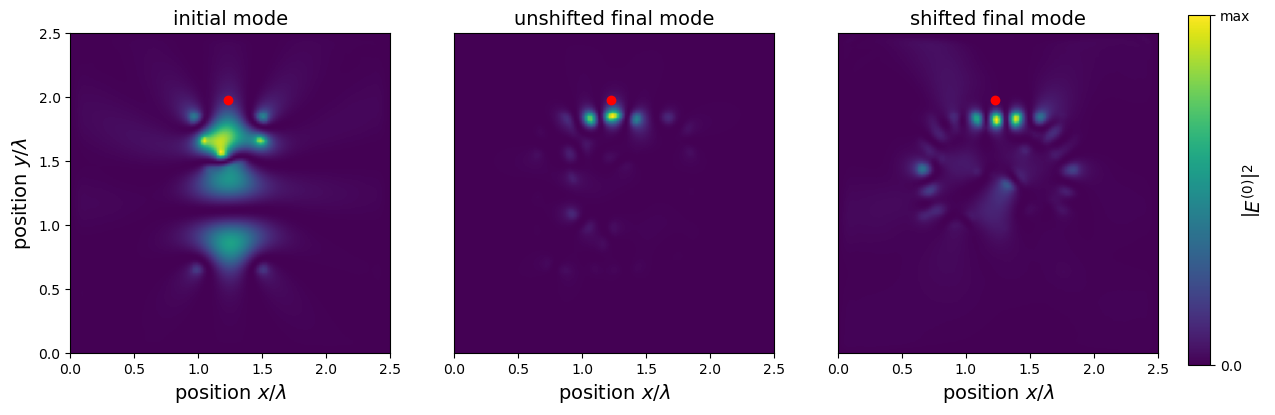

In [37]:
figure(figsize=(15, 5))  # Wider figure

subplot(1, 3, 1)
im1 = imshow(outside_u_init, extent=(0, 5, 0, 5), vmin=0, vmax=maximum(outside_u_init))
plot(5(M÷2 - 1)/M, 5 - 5(N÷2 + offset - 1)/N, "ro")
xlabel(L"position $x / λ$", fontsize=14)
ylabel(L"position $y / λ$", fontsize=14)
ytick = gca().get_yticks()
gca().set_xticklabels(string.(ytick / 2))
gca().set_yticklabels(string.(ytick / 2))
title("initial mode", fontsize=14)

subplot(1, 3, 2)
im2 = imshow(outside_u_opt, extent=(0, 5, 0, 5), vmin=0, vmax=maximum(outside_u_opt))
plot(5(M÷2 - 1)/M, 5 - 5(N÷2 + offset - 1)/N, "ro")
yticks([])
xlabel(L"position $x / λ$", fontsize=14)
gca().set_xticklabels(string.(ytick / 2))
title("unshifted final mode", fontsize=14)

subplot(1, 3, 3)
im3 = imshow(outside_mod_u_opt, extent=(0, 5, 0, 5), vmin=0, vmax=maximum(outside_mod_u_opt))
plot(5(M÷2 - 1)/M, 5 - 5(N÷2 + offset - 1)/N, "ro")
yticks([])
xlabel(L"position $x / λ$", fontsize=14)
gca().set_xticklabels(string.(ytick / 2))
title("shifted final mode", fontsize=14)

# Adjust subplot spacing to make room for colorbar
subplots_adjust(right=0.85)

# Add colorbar to the figure
cax = gcf().add_axes([0.87, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
cbar = colorbar(im3, cax=cax)
cbar.set_label(L"$\left|E^{(0)}\right|^2$", fontsize=14)
cbar.set_ticks([0, maximum(outside_mod_u_opt)])
cbar.set_ticklabels(["0.0", "max"])
cbar.ax.yaxis.labelpad = -6

savefig("modes2d.pdf")

In [20]:
function make_smooth_plot(lst)
    current = lst[1]
    output = Float64[current]
    for i in 2:length(lst)
        lst_i = lst[i]
        if lst_i > current
            current = lst_i
        end

        push!(output, current)
    end

    return output
end

make_smooth_plot (generic function with 1 method)

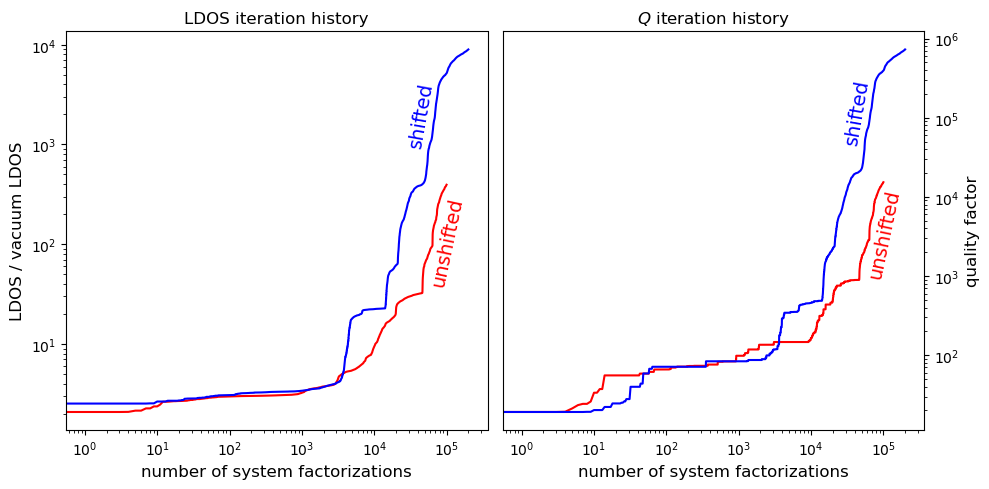

In [24]:
figure(figsize=(10, 5))

subplot(1, 2, 1)
loglog(make_smooth_plot(outside_LDOS_vals), color="red")
loglog(make_smooth_plot(outside_mod_LDOS_vals), color="blue")
title("LDOS iteration history")
ylabel("LDOS / vacuum LDOS", fontsize=12)
xlabel("number of system factorizations", fontsize=12)
text(2.8e4, 1e3, "shifted", color="blue", fontsize=14, rotation=80)
text(5.7e4, 4e1, "unshifted", color="red", fontsize=14, rotation=78)

# Right plot
subplot(1, 2, 2)
loglog(make_smooth_plot(outside_Qs), color="red")
loglog(make_smooth_plot(outside_mod_Qs), color="blue")
title(L"$Q$ iteration history")
ylabel("quality factor", fontsize=12)
gca().yaxis.tick_right()        # move ticks to the right
gca().yaxis.set_label_position("right")  # move label to the right
xlabel("number of system factorizations", fontsize=12)
text(2.7e4, 5e4, "shifted", color="blue", fontsize=14, rotation=80)
text(5.65e4, 1e3, "unshifted", color="red", fontsize=14, rotation=78)

tight_layout()
savefig("plots2d.pdf")